In [30]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN



In [2]:
# Here, the dataset is a ready cleaned data
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("car_purchasing.csv")

# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [3]:
df.head()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

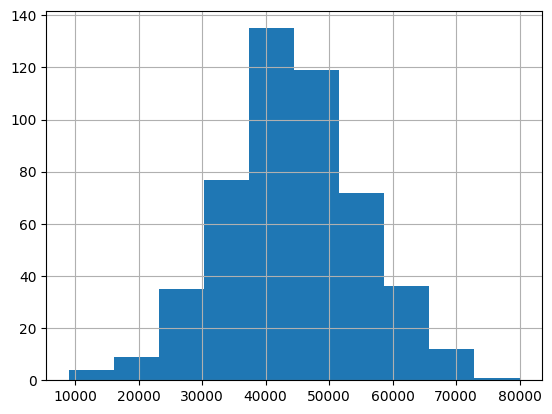

In [5]:
# this shows the histogram of 
# targeted variable "car_purchase_amount"
df["car_purchase_amount"].hist()

In [6]:
df.columns

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth',
       'car_purchase_amount'],
      dtype='object')

In [7]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth']]

y = df['car_purchase_amount']

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

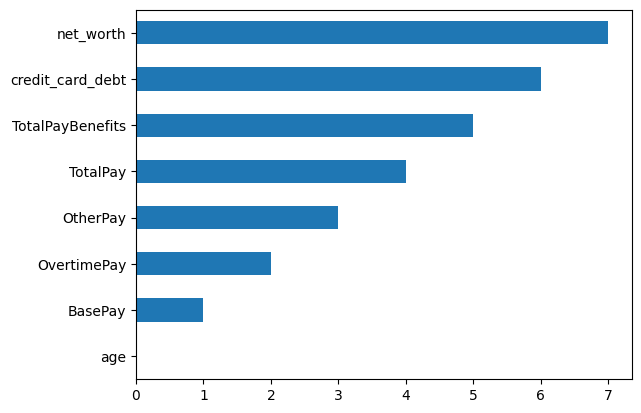

In [8]:
# Oh wow! It is so interesting that 'age'
# is the least important features. 
# Shocked to say the least.
# And follow by BasePay.
# Surprisely, net_worth is the most important here
# Next is credit_card_debit and 
# then TotalPayBenefits which I think was so 
# because of the other pays features.
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

In [9]:
# the SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
7,net_worth,34708322.18
3,OtherPay,21485830.81
2,OvertimePay,20117023.91
1,BasePay,6449389.98
5,TotalPayBenefits,2724925.69
4,TotalPay,2724925.69
6,credit_card_debt,622680.56
0,age,686.57


<h4>The two methods above - Fisher_score and SelectKBest score both have similarity which shows that 'net_worth' was the most important and 'age' the least important feature. And the next is 'TotalPayBenefits' and 'TotalPay' which I believe is due to the multlicollinearity variables</h4>

In [10]:

X = df.drop("car_purchase_amount", axis=1)
y = df['car_purchase_amount']


# Step 1: Scale the features for autoencoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 2: Define and train the autoencoder model
input_dim = X_scaled.shape[1]  # Number of features
autoencoder = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(64, activation='relu'),  # Hidden layer 3
    Dense(input_dim, activation='linear')  # Output layer (reconstruction)
])

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=1)

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 1.1631
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7630
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6789
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3350
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.22138
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0767
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071
Epoch 16/50
1

In [11]:
# Here, it detect anomalies using the autoencoder
# and then removed the them
reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Define anomaly threshold (e.g., top 5% reconstruction error)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# anomalies threshold, this case top 5% is considered noise etc.
threshold = np.percentile(reconstruction_error, 95)

# get anomalies / noise etc.
anomalies = reconstruction_error > threshold
anomaly_indices = np.where(anomalies)[0]

# get the noisy/anomaly rows
anomaly_mask = df.index.isin(anomaly_indices)

df[anomaly_mask]

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.38,238961.25,35321.46
11,53,99722.00,87082.62,110804.30,297608.92,297608.92,10014.97,293862.51,42288.81
12,44,294580.02,0.00,0.00,294580.02,294580.02,10218.32,430907.17,28700.03
34,46,177781.25,59924.97,20658.00,258364.22,258364.22,7988.75,215673.54,39810.35
37,22,110661.20,31162.04,111446.20,253269.44,253269.44,10917.14,326742.74,10092.23
47,51,248895.77,0.00,0.00,248895.77,248895.77,2230.10,158979.71,37843.47
55,57,226206.80,0.00,15004.37,241211.17,241211.17,6998.47,438067.75,48100.29
65,43,185369.69,37873.61,14465.53,237708.83,237708.83,6841.54,662176.49,52954.93
80,33,172529.08,0.00,58776.96,231306.04,231306.04,6147.92,441527.01,38399.46
99,43,224035.85,0.00,0.00,224035.85,224035.85,16767.26,759479.46,42187.68


In [12]:
# typical X/y -split
X = df.drop("car_purchase_amount", axis=1)
y = df['car_purchase_amount']

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
model = RandomForestRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
results_df

,Feature,Ranking,Selected
0,age,1,True
1,BasePay,1,True
2,OvertimePay,1,True
3,OtherPay,1,True
5,TotalPayBenefits,1,True
6,credit_card_debt,1,True
7,net_worth,1,True
4,TotalPay,2,False


In [13]:
# Assuming 'lr_results_df' contains the RFE results for LinearRegression
# Extract the selected features based on RFE
selected_features = results_df[results_df["Selected"] == True]["Feature"].tolist()

In [14]:
# Prepare the dataset with selected features
X_selected = X[selected_features]
y = df["car_purchase_amount"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = RandomForestRegressor()
lr_model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# Make predictions on the test set
# y_pred = lr_model.predict(X_test)
test_predictions = lr_model.predict(X_test)

In [16]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
5271.72 %

MSE
40962091.23 %^2

RMSE:
6400.16 %

R-squared:
0.62

Explained variance score:
0.62


<h4>I think the model performs moderately well, which shows 63% of the variance in car purchase amounts. However, the large error metrics in MAE, MSE, and RMSE indicate room for improvement, suggesting that predictions deviate significantly from the actual values.</h4>

<h4>Here, I used SMOTE tool method because I am dealing with continuous classification data </h4>

In [31]:
from sklearn.impute import SimpleImputer

target = 'car_purchase_amount'

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df[target] = imputer.fit_transform(df[[target]])

# Check if missing values are handled
print(f"Missing values after median imputation: {df[target].isnull().sum()}")

# If still missing values exist, impute with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[target] = imputer.fit_transform(df[[target]])

# Check again if any missing values remain
print(f"Missing values after most frequent imputation: {df[target].isnull().sum()}")

Missing values after median imputation: 0
Missing values after most frequent imputation: 0


<h4>It's a Classification- the Classes has be grouped into bin</h4>

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Bin the 'car_purchase_amount' column into categories (e.g., 5 bins)
n_bins = 5  # Number of bins
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = binning.fit_transform(df[target].values.reshape(-1, 1)).flatten()  # Flatten to 1D array

# Add the binned target column to the DataFrame
df['binned_car_purchase_amount'] = y_binned

# Check the distribution of the binned target variable before resampling
bin_counts = df['binned_car_purchase_amount'].value_counts()
print("Bin counts before resampling:")
print(bin_counts)

# Create the SMOTE sampling strategy based on bin counts
strategy = {bin_label: max(bin_counts) for bin_label in bin_counts.index}

# Apply SMOTE for oversampling
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'credit_card_debt', 'net_worth']]
y = df['binned_car_purchase_amount']

smote = SMOTE(sampling_strategy=strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['binned_car_purchase_amount'] = y_resampled

# Check the resampled dataset
print("Resampled dataset:")
print(df_resampled['binned_car_purchase_amount'].value_counts())


Bin counts before resampling:
binned_car_purchase_amount
0.00    100
2.00    100
4.00    100
3.00    100
1.00    100
Name: count, dtype: int64
Resampled dataset:
binned_car_purchase_amount
0.00    100
2.00    100
4.00    100
3.00    100
1.00    100
Name: count, dtype: int64


In [34]:
# combine dataframes, which have the original data + newly generated data
df = pd.concat([df, df_resampled])

In [35]:
# Check for duplicate columns
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [36]:
# Check for duplicate indices
print(df.index[df.index.duplicated()])

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)


In [37]:
# Reset the index to ensure it's unique and continuous
df = df.reset_index(drop=True)

In [38]:
df_resampled['car_purchase_amount'] = df['car_purchase_amount']

<Axes: xlabel='car_purchase_amount', ylabel='Count'>

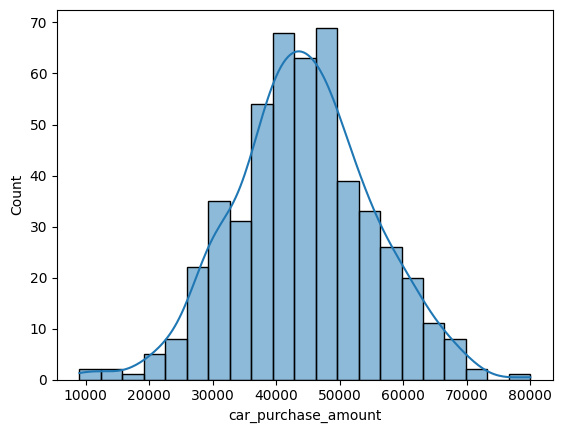

In [39]:
sns.histplot(data=df, x="car_purchase_amount", kde=True)

<Axes: xlabel='binned_car_purchase_amount', ylabel='Count'>

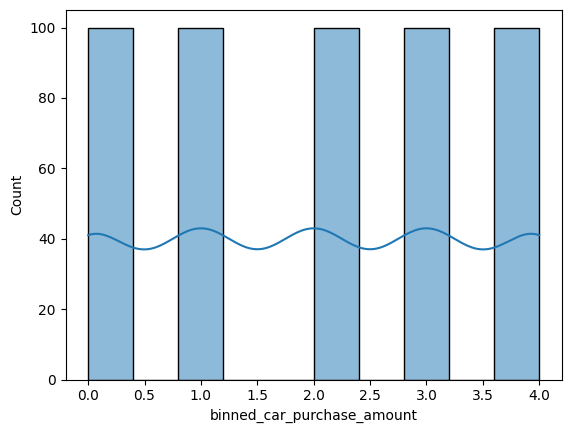

In [ ]:
# this is to check if new distribution, 
# closer to balanced
# the bin 2 skewed towards left though
# sns.histplot(data=df_resampled, x="car_purchase_amount", kde=True)
# sns.histplot(data=df, x="car_purchase_amount", kde=True)
sns.histplot(data=df_resampled, x="binned_car_purchase_amount", kde=True)

In [41]:
print(df_resampled.columns)

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth',
       'binned_car_purchase_amount', 'car_purchase_amount'],
      dtype='object')


In [42]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,binned_car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.38,238961.25,35321.46,0.00
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.96,530973.91,45115.53,2.00
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.36,638467.18,42925.71,2.00
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.16,548599.05,67422.36,4.00
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.71,560304.07,55915.46,4.00
...,...,...,...,...,...,...,...,...,...,...
995,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.90,541670.10,NaN,3.00
996,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.46,360419.10,NaN,0.00
997,54,185724.50,0.00,0.00,185724.50,185724.50,10611.61,764531.32,NaN,4.00
998,59,185724.50,0.00,0.00,185724.50,185724.50,14013.03,337826.64,NaN,2.00


In [43]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Preparing the data
# Also drop target column
X = df_resampled.drop(columns=['binned_car_purchase_amount'])  
y = df_resampled['binned_car_purchase_amount']  # Target column

# I then split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This is usually helps with boosting models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Then next is to train the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(y.unique()),  # Number of classes (bins)
    eval_metric='mlogloss',  # Log loss metric for multi-class classification
    use_label_encoder=False,  # Avoid the warning for label encoding
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Depth of the trees
    learning_rate=0.1,  # Learning rate
    colsample_bytree=0.8,  # Fraction of features used at each tree
    subsample=0.8,  # Fraction of samples used for each tree
    gamma=0.1  # Minimum loss reduction required to make a further partition
)

# Training the model
model.fit(X_train_scaled, y_train)

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [45]:
# This actually evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


<Axes: >

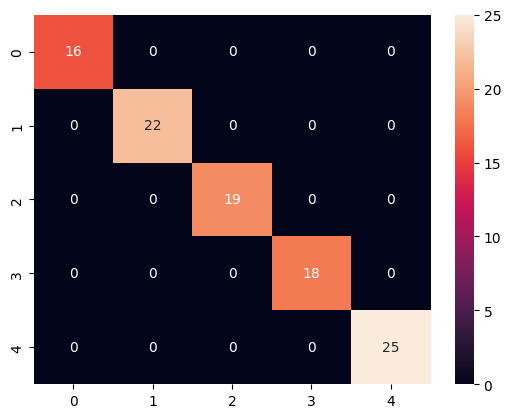

In [46]:
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        18
         4.0       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Model overall accuracy: 100.00%
